# Crypto Analysis with Python

### Analysing the current price of crypto coin w.r.t the currencies

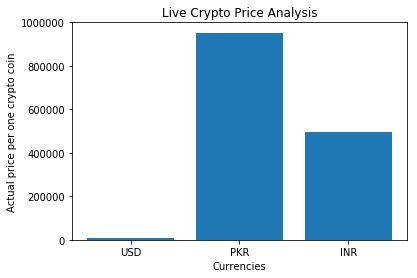

In [54]:
import requests
from matplotlib import pyplot as plt

def price(symbol, comparison=['USD'], exchange=""):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    
    page = requests.get(url)
    data = page.json()

    return data


crypto_data = price('btc', ['usd','pkr','inr'])


list_of_currency = [currency for currency, _ in crypto_data.items()]

list_of_amount = [money for _, money in crypto_data.items()]


plt.bar(list_of_currency, list_of_amount)
plt.title("Live Crypto Price Analysis")
plt.xlabel("Currencies")
plt.ylabel("Actual price per one crypto coin")
plt.show()


### Analysing the historic prices of crypto coin per days

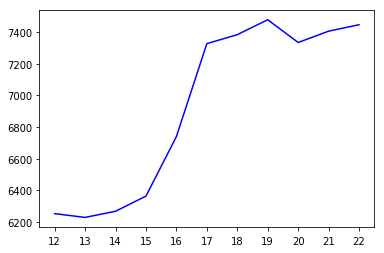

In [50]:
import pandas as pd
import datetime
def per_day_history_data(symbol, comparison, limit=5):
    url = "https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}"\
            .format(symbol.upper(), comparison.upper(), limit)
    page = requests.get(url)
    data = page.json()["Data"]
    df = pd.DataFrame(data)
    df["timestamp"] = [datetime.datetime.fromtimestamp(d).strftime("%d") for d in df.time]
    del df["time"]
    return df
df = per_day_history_data('btc', 'usd', 10)
plt.plot(df["timestamp"], df["close"], color="blue")
plt.tick_params(axis='x', which='major', pad=5)
plt.show()
